<a href="https://colab.research.google.com/github/JavZon/Data-processing-and-preparation/blob/main/MLR_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dataset

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [7]:
housing=df[df['district']=='Чиланзарский']
print(housing.shape)
housing.head()

(1616, 6)


,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [19]:
housing.drop(columns='district', inplace=True)
housing.head()

<ipython-input-19-09a68d9b9b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.drop(columns='district', inplace=True)


,rooms,size,level,max_levels,price
2,2,42.0,4,4,37000.0
3,3,65.0,1,4,49500.0
4,3,70.0,3,5,55000.0
5,1,28.0,1,4,25500.0
6,1,30.0,2,4,21200.0


In [20]:
housing.isnull().sum()

rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

**Correlation**

In [21]:
housing.corr()

,rooms,size,level,max_levels,price
rooms,1.000000,0.868771,0.265235,0.279517,0.703835
size,0.868771,1.000000,0.306221,0.444404,0.843639
level,0.265235,0.306221,1.000000,0.548681,0.138780
max_levels,0.279517,0.444404,0.548681,1.000000,0.340015
price,0.703835,0.843639,0.138780,0.340015,1.000000


In [22]:
housing.corrwith(housing['price']).sort_values(ascending=False)

price         1.000000
size          0.843639
rooms         0.703835
max_levels    0.340015
level         0.138780
dtype: float64

**Vizualization**

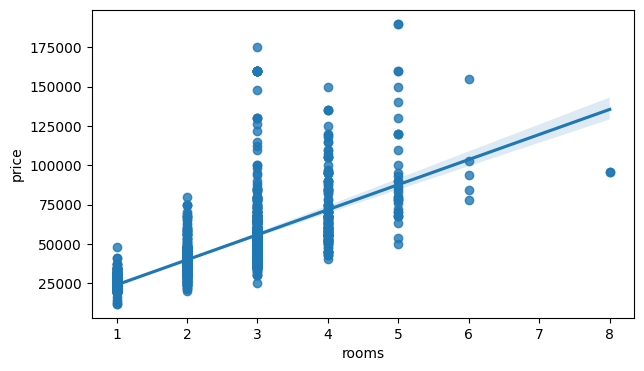

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,4))
sns.regplot(data=housing, x='rooms', y='price')
plt.show()

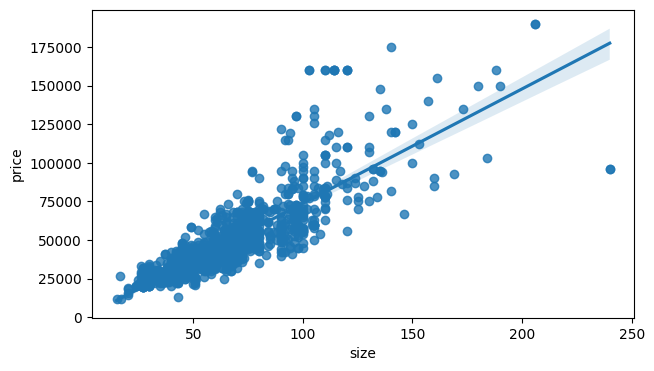

In [16]:
plt.figure(figsize=(7,4))
sns.regplot(data=housing, x='size', y='price')
plt.show()

<Figure size 1000x600 with 0 Axes>

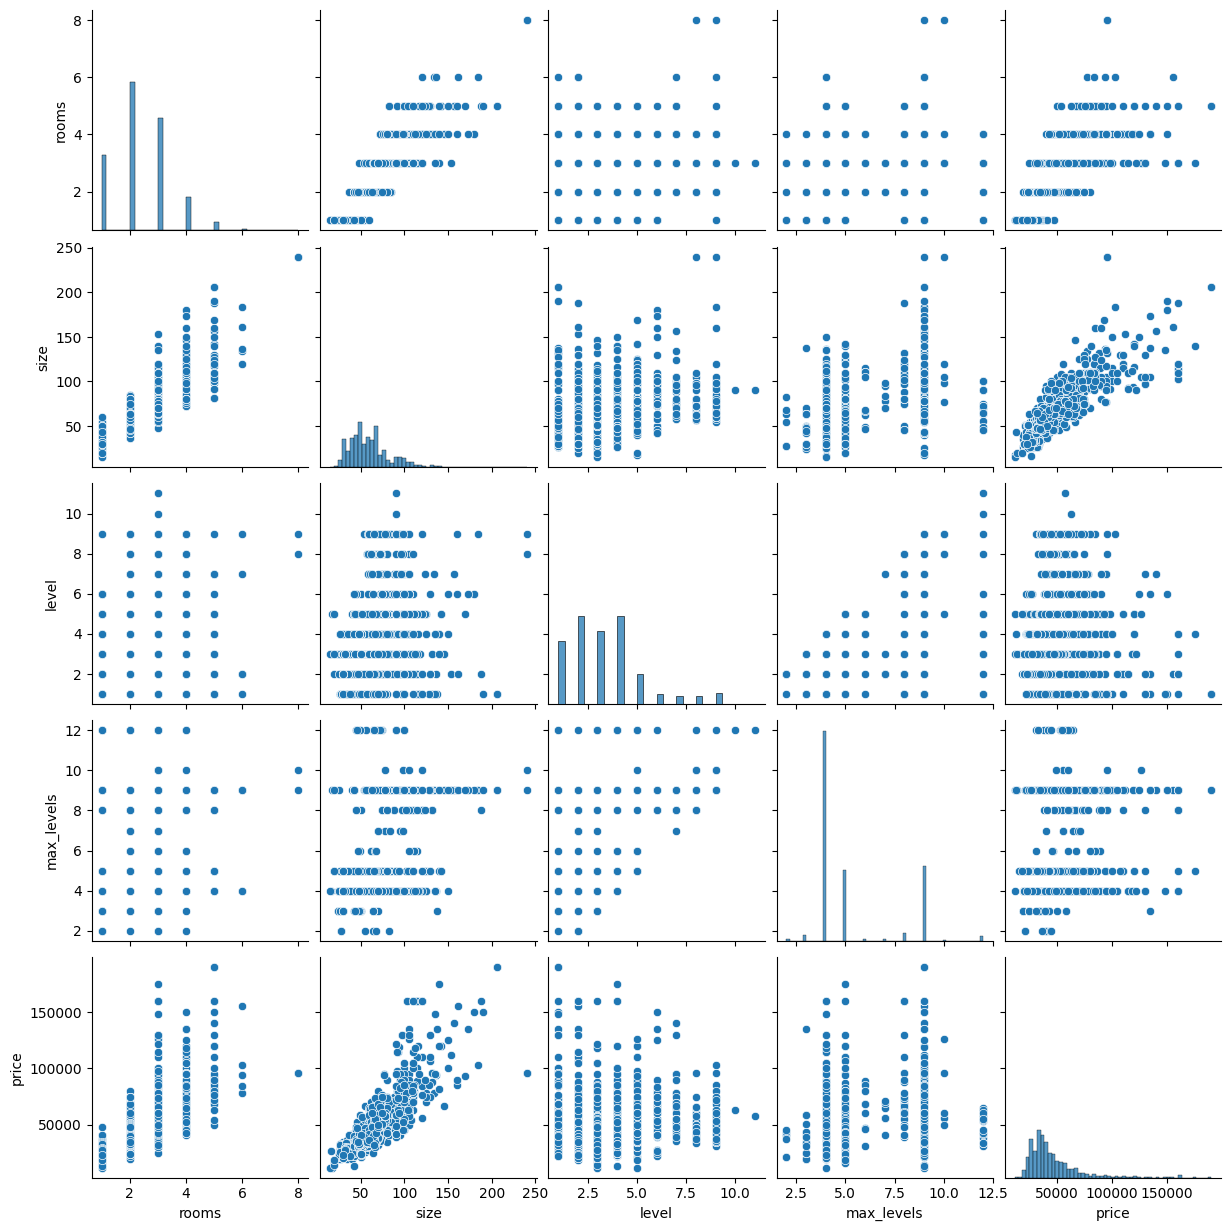

In [17]:
plt.figure(figsize=(10,6))
sns.pairplot(data=housing[['rooms','size','level','max_levels','price']])
plt.show()

We split our dataset using **train_test_split**

In [24]:

from sklearn.model_selection import train_test_split
X=housing.drop(columns='price')
Y=housing['price'].copy()
X_train, X_test, y_train_label, y_test_label=train_test_split(X, Y, test_size=0.10, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train_label.shape)
print(y_test_label.shape)

(1454, 4)
(162, 4)
(1454,)
(162,)


**ML**

In [26]:
from sklearn.linear_model import LinearRegression
MLR_model=LinearRegression()
MLR_model.fit(X_train, y_train_label)

LinearRegression()

In [27]:
print("Coef : ", MLR_model.coef_)
print("Intercept : ", MLR_model.intercept_)

Coef :  [-3010.03748405   862.9397714  -1555.84111641   148.01175648]
Intercept :  3458.3511823337685


**Variance inflation factor**

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your dataframe with predictors
X2 = housing[['size', 'rooms', 'max_levels', 'level']]
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(len(X2.columns))]

print(vif_data)

      feature        VIF
0        size  33.515416
1       rooms  26.284291
2  max_levels  10.172228
3       level   5.854052
